# Lead_score_Casestudy

# <font color=purple>Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

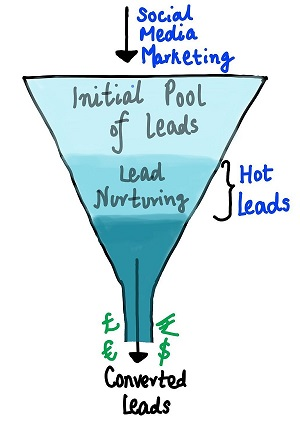

As we can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

# <font color=purple>Objective:
- Select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 
- The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### <font color=purple> Suppress Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### <font color=purple>1.1 Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta


# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

#Model Building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### <font color=purple>1.3 Adjusting Jupyter View


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

##  <font color=purple> 2. Reading and understanding the Data

###  <font color=purple> 2.1 Reading the input files

In [4]:
Lead_score=pd.read_csv('Leads.csv')
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [5]:
# Reading the data dictionary file
Lead_score_data_dict=pd.read_excel('Leads Data Dictionary.xlsx')
Lead_score_data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,nan,NaN,NaN
1,nan,Variables,Description
2,nan,Prospect ID,A unique ID with which the customer is identified.
3,nan,Lead Number,A lead number assigned to each lead procured.
4,nan,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
5,nan,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
6,nan,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
7,nan,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
8,nan,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
9,nan,TotalVisits,The total number of visits made by the customer on the website.


### <font color=purple>  2.2 Data Inspection

In [6]:
# Checking shape of Dataframe
Row_col=Lead_score.shape
Row_col

(9240, 37)

- #### <font color=green>The dataset contains 9240 rows and 37 columns

In [7]:
# Checking size
Lead_score.size

341880

In [8]:
#checking the datatypes
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- #### <font color=green>Looking at the above information we see that there are some columns which have null data.


In [9]:
# Checking the statistical details of numerical columns
Lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


##  <font color=purple> 3. Data Cleaning

### <font color=purple>3.1. Handling 'Select' in categorical columns:

#### <font color=blue>As we can observe that there are select values for many columns.This is because customer did not select any option from the list, hence it shows select.Select values are as good as NULL.

In [10]:
# Checking for 'select' Values
print(Lead_score['Specialization'].str.contains('Select').value_counts())
print(Lead_score['How did you hear about X Education'].str.contains('Select').value_counts())
print(Lead_score['Lead Profile'].str.contains('Select').value_counts())
print(Lead_score['Country'].str.contains('Select').value_counts())

False    5860
True     1942
Name: Specialization, dtype: int64
True     5043
False    1990
Name: How did you hear about X Education, dtype: int64
True     4146
False    2385
Name: Lead Profile, dtype: int64
False    6779
Name: Country, dtype: int64


In [11]:
# Converting 'Select' values to NaN.
Lead_score = Lead_score.replace('Select', np.nan)

In [12]:
# Checking for 'select' Values after replacing them with np.nan
print(Lead_score['Specialization'].str.contains('Select').value_counts())
print(Lead_score['How did you hear about X Education'].str.contains('Select').value_counts())
print(Lead_score['Lead Profile'].str.contains('Select').value_counts())
print(Lead_score['Country'].str.contains('Select').value_counts())

False    5860
Name: Specialization, dtype: int64
False    1990
Name: How did you hear about X Education, dtype: int64
False    2385
Name: Lead Profile, dtype: int64
False    6779
Name: Country, dtype: int64


#### <font color=green>This confirms that all 'Select' values are converted to NAN values

### <font color=purple>3.2. Checking and handling missing values:

In [13]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(Lead_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(Lead_score.isnull().sum()/Lead_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.4600
Lead Profile,6855,74.1900
Lead Quality,4767,51.5900
Asymmetrique Profile Score,4218,45.6500
Asymmetrique Activity Score,4218,45.6500
Asymmetrique Profile Index,4218,45.6500
Asymmetrique Activity Index,4218,45.6500
City,3669,39.7100
Specialization,3380,36.5800
Tags,3353,36.2900


- #### <font color=green>There are missing values in the data. Lets drop the columns having more than 45% NA values.

In [14]:
# we will drop the columns having more than 40% NA values.
Lead_score = Lead_score.drop(Lead_score.loc[:,list(round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)>45)].columns, axis=1)
Lead_score.shape

(9240, 30)

- #### <font color=green> We can see 7 columns have been removed from the data

###  <font color=purple>3.3. Number of unique categories in the columns:

In [15]:
#We can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

Lead_score.nunique().sort_values()

Receive More Updates About Our Courses           1   
I agree to pay the amount through cheque         1   
Magazine                                         1   
Get updates on DM Content                        1   
Update me on Supply Chain Content                1   
Search                                           2   
A free copy of Mastering The Interview           2   
Newspaper                                        2   
Digital Advertisement                            2   
Through Recommendations                          2   
X Education Forums                               2   
Converted                                        2   
Do Not Call                                      2   
Do Not Email                                     2   
Newspaper Article                                2   
What matters most to you in choosing a course    3   
Lead Origin                                      5   
What is your current occupation                  6   
City                        

### <font color=purple>3.4. Remove columns with too much variation in the parameters(Highly Skewed)


#### <font color=green>The columns 'Tags' is the lead-score variable generated by sales team after a potential lead is convereted to hotlead.Hence not required for analysis

In [16]:
# Dropping the columns
drop_cols=['Tags']
Lead_score.drop(labels=drop_cols,axis=1,inplace=True)

### <font color=purple>3.5. For the columns with higher number of categories with less % impute them with <font color=brown>'Others'

In [17]:
round((Lead_score['What matters most to you in choosing a course'].value_counts(normalize=True)*100),2)

Better Career Prospects     99.9500
Flexibility & Convenience   0.0300 
Other                       0.0200 
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
need = Lead_score['What matters most to you in choosing a course'].value_counts().index[:2]
Lead_score['What matters most to you in choosing a course'] = np.where(Lead_score['What matters most to you in choosing a course'].isin(need),Lead_score['What matters most to you in choosing a course'], 'OTHER')
round((Lead_score['What matters most to you in choosing a course'].value_counts(normalize=True)*100),2)

Better Career Prospects     70.6500
OTHER                       29.3300
Flexibility & Convenience   0.0200 
Name: What matters most to you in choosing a course, dtype: float64

In [19]:
round((Lead_score['Lead Origin'].value_counts(normalize=True)*100),2)

Landing Page Submission   52.8800
API                       38.7400
Lead Add Form             7.7700 
Lead Import               0.6000 
Quick Add Form            0.0100 
Name: Lead Origin, dtype: float64

In [20]:
need = Lead_score['Lead Origin'].value_counts().index[:4]
Lead_score['Lead Origin'] = np.where(Lead_score['Lead Origin'].isin(need),Lead_score['Lead Origin'], 'OTHER')

In [21]:
round((Lead_score['Lead Origin'].value_counts(normalize=True)*100),2)

Landing Page Submission   52.8800
API                       38.7400
Lead Add Form             7.7700 
Lead Import               0.6000 
OTHER                     0.0100 
Name: Lead Origin, dtype: float64

In [22]:
round((Lead_score['What is your current occupation'].value_counts(normalize=True)*100),2)

Unemployed             85.5000
Working Professional   10.7800
Student                3.2100 
Other                  0.2400 
Housewife              0.1500 
Businessman            0.1200 
Name: What is your current occupation, dtype: float64

In [23]:
need = Lead_score['What is your current occupation'].value_counts().index[:5]
Lead_score['What is your current occupation'] = np.where(Lead_score['What is your current occupation'].isin(need),Lead_score['What is your current occupation'], 'OTHER')

In [24]:
round((Lead_score['What is your current occupation'].value_counts(normalize=True)*100),2)

Unemployed             60.6100
OTHER                  29.2000
Working Professional   7.6400 
Student                2.2700 
Other                  0.1700 
Housewife              0.1100 
Name: What is your current occupation, dtype: float64

In [25]:
round((Lead_score['City'].value_counts(normalize=True)*100),2)

Mumbai                        57.8400
Thane & Outskirts             13.5000
Other Cities                  12.3100
Other Cities of Maharashtra   8.2000 
Other Metro Cities            6.8200 
Tier II Cities                1.3300 
Name: City, dtype: float64

In [26]:
need = Lead_score['City'].value_counts().index[:4]
Lead_score['City'] = np.where(Lead_score['City'].isin(need),Lead_score['City'], 'OTHER')

In [27]:
round((Lead_score['City'].value_counts(normalize=True)*100),2)

OTHER                         44.6200
Mumbai                        34.8700
Thane & Outskirts             8.1400 
Other Cities                  7.4200 
Other Cities of Maharashtra   4.9500 
Name: City, dtype: float64

In [28]:
round((Lead_score['Last Notable Activity'].value_counts(normalize=True)*100),2)

Modified                       36.8700
Email Opened                   30.6000
SMS Sent                       23.5100
Page Visited on Website        3.4400 
Olark Chat Conversation        1.9800 
Email Link Clicked             1.8700 
Email Bounced                  0.6500 
Unsubscribed                   0.5100 
Unreachable                    0.3500 
Had a Phone Conversation       0.1500 
Email Marked Spam              0.0200 
Resubscribed to emails         0.0100 
Approached upfront             0.0100 
Form Submitted on Website      0.0100 
Email Received                 0.0100 
View in browser link Clicked   0.0100 
Name: Last Notable Activity, dtype: float64

In [29]:
need = Lead_score['Last Notable Activity'].value_counts().index[:6]
Lead_score['Last Notable Activity'] = np.where(Lead_score['Last Notable Activity'].isin(need),Lead_score['Last Notable Activity'], 'OTHER')

In [30]:
round((Lead_score['Last Notable Activity'].value_counts(normalize=True)*100),2)

Modified                  36.8700
Email Opened              30.6000
SMS Sent                  23.5100
Page Visited on Website   3.4400 
Olark Chat Conversation   1.9800 
Email Link Clicked        1.8700 
OTHER                     1.7300 
Name: Last Notable Activity, dtype: float64

In [31]:
round((Lead_score['Last Activity'].value_counts(normalize=True)*100),2)

Email Opened                   37.6200
SMS Sent                       30.0400
Olark Chat Conversation        10.6500
Page Visited on Website        7.0000 
Converted to Lead              4.6800 
Email Bounced                  3.5700 
Email Link Clicked             2.9200 
Form Submitted on Website      1.2700 
Unreachable                    1.0200 
Unsubscribed                   0.6700 
Had a Phone Conversation       0.3300 
Approached upfront             0.1000 
View in browser link Clicked   0.0700 
Email Marked Spam              0.0200 
Email Received                 0.0200 
Resubscribed to emails         0.0100 
Visited Booth in Tradeshow     0.0100 
Name: Last Activity, dtype: float64

In [32]:
need = Lead_score['Last Activity'].value_counts().index[:10]
Lead_score['Last Activity'] = np.where(Lead_score['Last Activity'].isin(need),Lead_score['Last Activity'], 'OTHER')

In [33]:
round((Lead_score['Last Activity'].value_counts(normalize=True)*100),2)

Email Opened                37.2000
SMS Sent                    29.7100
Olark Chat Conversation     10.5300
Page Visited on Website     6.9300 
Converted to Lead           4.6300 
Email Bounced               3.5300 
Email Link Clicked          2.8900 
OTHER                       1.6700 
Form Submitted on Website   1.2600 
Unreachable                 1.0100 
Unsubscribed                0.6600 
Name: Last Activity, dtype: float64

In [34]:
round((Lead_score['Specialization'].value_counts(normalize=True)*100),2)

Finance Management                  16.6600
Human Resource Management           14.4700
Marketing Management                14.3000
Operations Management               8.5800 
Business Administration             6.8800 
IT Projects Management              6.2500 
Supply Chain Management             5.9600 
Banking, Investment And Insurance   5.7700 
Media and Advertising               3.4600 
Travel and Tourism                  3.4600 
International Business              3.0400 
Healthcare Management               2.7100 
Hospitality Management              1.9500 
E-COMMERCE                          1.9100 
Retail Management                   1.7100 
Rural and Agribusiness              1.2500 
E-Business                          0.9700 
Services Excellence                 0.6800 
Name: Specialization, dtype: float64

In [35]:
need = Lead_score['Specialization'].value_counts().index[:10]
Lead_score['Specialization'] = np.where(Lead_score['Specialization'].isin(need),Lead_score['Specialization'], 'OTHER')

In [36]:
round((Lead_score['Specialization'].value_counts(normalize=True)*100),2)

OTHER                               45.6000
Finance Management                  10.5600
Human Resource Management           9.1800 
Marketing Management                9.0700 
Operations Management               5.4400 
Business Administration             4.3600 
IT Projects Management              3.9600 
Supply Chain Management             3.7800 
Banking, Investment And Insurance   3.6600 
Media and Advertising               2.2000 
Travel and Tourism                  2.2000 
Name: Specialization, dtype: float64

In [37]:
round((Lead_score['Lead Source'].value_counts(normalize=True)*100),2)

Google              31.1600
Direct Traffic      27.6300
Olark Chat          19.0700
Organic Search      12.5400
Reference           5.8000 
Welingak Website    1.5400 
Referral Sites      1.3600 
Facebook            0.6000 
bing                0.0700 
google              0.0500 
Click2call          0.0400 
Live Chat           0.0200 
Press_Release       0.0200 
Social Media        0.0200 
WeLearn             0.0100 
welearnblog_Home    0.0100 
Pay per Click Ads   0.0100 
testone             0.0100 
blog                0.0100 
youtubechannel      0.0100 
NC_EDM              0.0100 
Name: Lead Source, dtype: float64

In [38]:
need = Lead_score['Lead Source'].value_counts().index[:8]
Lead_score['Lead Source'] = np.where(Lead_score['Lead Source'].isin(need),Lead_score['Lead Source'], 'OTHER')

In [39]:
round((Lead_score['Lead Source'].value_counts(normalize=True)*100),2)

Google             31.0400
Direct Traffic     27.5200
Olark Chat         18.9900
Organic Search     12.4900
Reference          5.7800 
Welingak Website   1.5400 
Referral Sites     1.3500 
OTHER              0.6900 
Facebook           0.6000 
Name: Lead Source, dtype: float64

In [40]:
round((Lead_score['Country'].value_counts(normalize=True)*100),2)

India                  95.7700
United States          1.0200 
United Arab Emirates   0.7800 
Singapore              0.3500 
Saudi Arabia           0.3100 
United Kingdom         0.2200 
Australia              0.1900 
Qatar                  0.1500 
Bahrain                0.1000 
Hong Kong              0.1000 
Oman                   0.0900 
France                 0.0900 
unknown                0.0700 
Nigeria                0.0600 
South Africa           0.0600 
Germany                0.0600 
Canada                 0.0600 
Kuwait                 0.0600 
Sweden                 0.0400 
Belgium                0.0300 
Uganda                 0.0300 
China                  0.0300 
Italy                  0.0300 
Ghana                  0.0300 
Netherlands            0.0300 
Asia/Pacific Region    0.0300 
Philippines            0.0300 
Bangladesh             0.0300 
Indonesia              0.0100 
Russia                 0.0100 
Liberia                0.0100 
Malaysia               0.0100 
Denmark 

In [41]:
need = Lead_score['Country'].value_counts().index[:10]
Lead_score['Country'] = np.where(Lead_score['Country'].isin(need),Lead_score['Country'], 'OTHERS')

In [42]:
round((Lead_score['Country'].value_counts(normalize=True)*100),2)

India                  70.2600
OTHERS                 27.3700
United States          0.7500 
United Arab Emirates   0.5700 
Singapore              0.2600 
Saudi Arabia           0.2300 
United Kingdom         0.1600 
Australia              0.1400 
Qatar                  0.1100 
Bahrain                0.0800 
Hong Kong              0.0800 
Name: Country, dtype: float64

In [43]:
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)

Prospect ID                                     0.0000
Lead Number                                     0.0000
Lead Origin                                     0.0000
Lead Source                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     1.4800
Total Time Spent on Website                     0.0000
Page Views Per Visit                            1.4800
Last Activity                                   0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Educatio

In [44]:
# Rest missing values are under 2% so we can drop these rows.
Lead_score.dropna(inplace = True)

In [45]:
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)

Prospect ID                                     0.0000
Lead Number                                     0.0000
Lead Origin                                     0.0000
Lead Source                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     0.0000
Total Time Spent on Website                     0.0000
Page Views Per Visit                            0.0000
Last Activity                                   0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Educatio

In [46]:
row_col=Lead_score.shape
row_col

(9103, 29)

In [47]:
# Checking row wise null values
(Lead_score.isnull().sum(axis=1)*100/len(Lead_score)).value_counts(ascending=True)

0.0000    9103
dtype: int64

In [48]:
Lead_score.size

263987

In [49]:
# Checking for duplicate values in dataset
Lead_score_dupl=Lead_score.copy()
Lead_score_dupl.drop_duplicates(subset=None,inplace=True)
Lead_score_dupl.size

263987

- #### <font color=green> The size of the dataframe remains same even after removing duplicates,Hence we can conclude that there are no duplicate values in dataset.

### <font color=purple> 3.6. Percentage of retained rows after data cleaning:

In [50]:
round(100*(row_col[0])/(Row_col[0]),2)

98.52

- ### <font color=green>Now the Data is clean with 98.5% of the rows retained after data cleaning.Now we can start with the analysis part

##  <font color=purple> 4. Data Visualization

###  <font color=blue>Converted

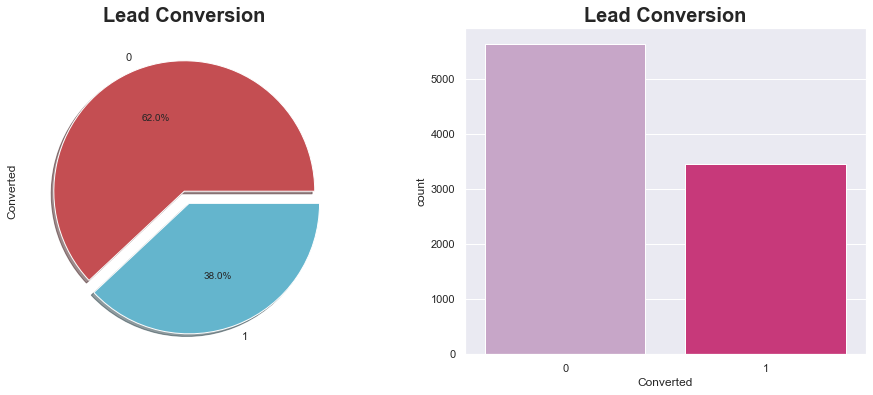

In [51]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['r','c']

Lead_score['Converted'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Lead Conversion',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.countplot('Converted',data=Lead_score,palette='PuRd')
plt.title('Lead Conversion',fontweight="bold", size=20)
plt.subplots_adjust(right=1)
plt.show()


- #### <font color=green> We can see from the plot that not many Leads were 'Converted'. Out of 9103 Leads, only around 3500 (38%) of the Leads were converted

###  <font color=blue>Lead Source

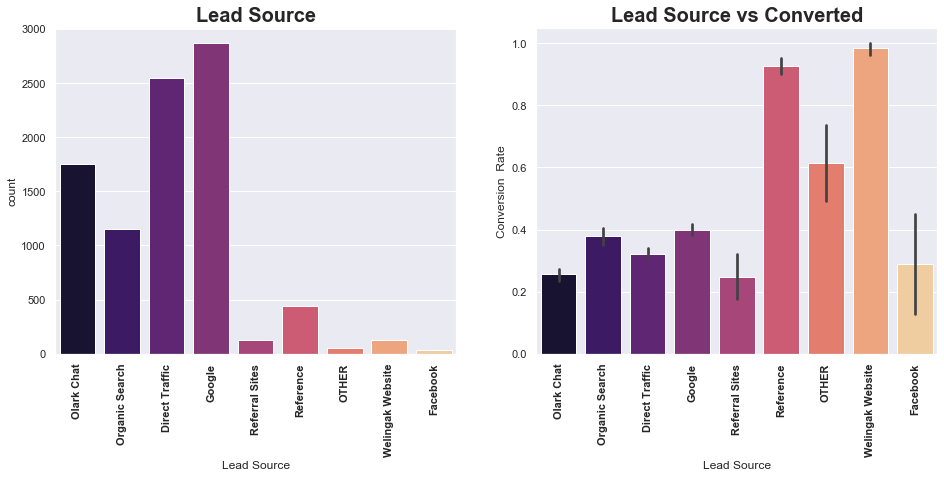

In [52]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)

sns.countplot(x='Lead Source', data =Lead_score, palette='magma')
plt.xticks(rotation = 90,fontweight="bold")
plt.title('Lead Source', fontweight='bold',size=20)
plt.subplot(1,2,2)
sns.barplot(x="Lead Source", y="Converted", data=Lead_score,palette='magma')
plt.title('Lead Source vs Converted',fontweight="bold", size=20)
plt.ylabel("Conversion  Rate")
plt.xticks(rotation = 90,fontweight="bold")
plt.subplots_adjust(right=1)
plt.show()

- #### <font color=green>The source of the Leads were more from Google, Direct traffic and Olark Chat
- #### <font color=green> Most of the Leads were converted from Welingak Website, Reference and Google too
    
- #### <font color=darkblue> To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

###  <font color=blue>Lead Origin

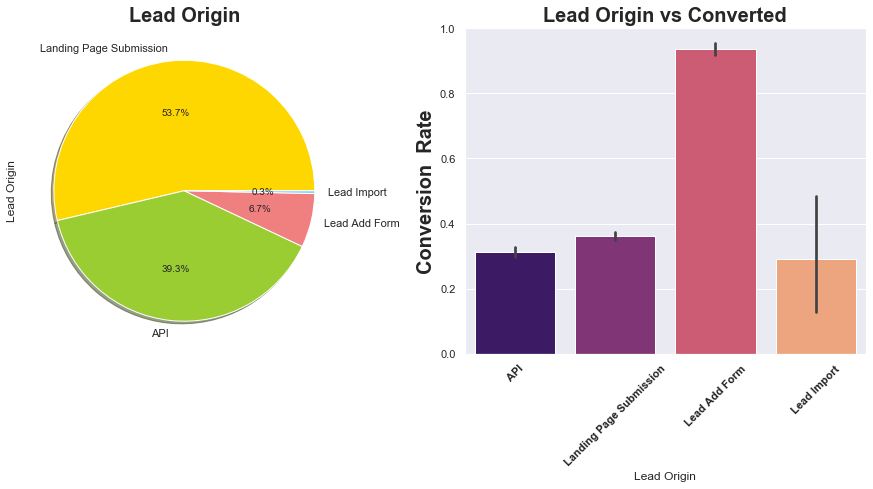

In [53]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','r']
Lead_score['Lead Origin'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Lead Origin',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(x="Lead Origin", y="Converted", data=Lead_score,palette='magma')
plt.title('Lead Origin vs Converted',fontweight="bold", size=20)
plt.ylabel("Conversion  Rate",fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplots_adjust(right=1)
plt.show()

- #### <font color=green>53.7% of the Leads have their origin from Landing page submission and 39% of Leads from API
- #### <font color=green>Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- #### <font color=green>Lead Import are very less in count.
    
- #### <font color=darkblue>To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

###  <font color=blue> Email and call

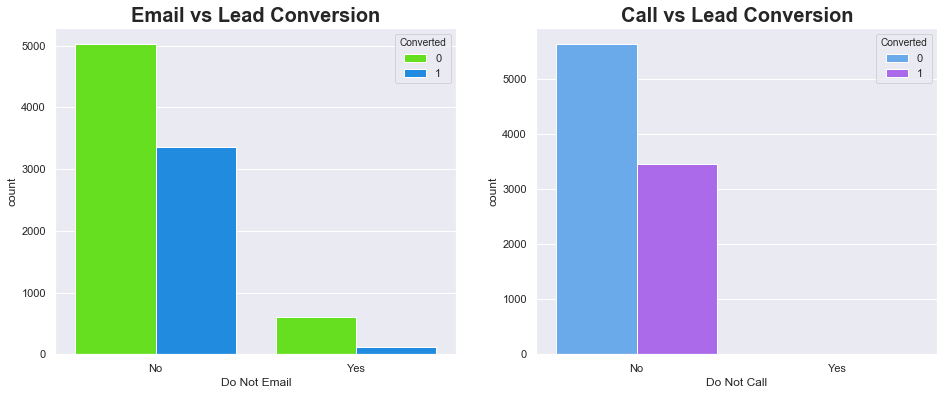

In [54]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = Lead_score, palette= 'gist_rainbow')

plt.title('Email vs Lead Conversion', fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = Lead_score, palette='cool')
plt.title('Call vs Lead Conversion',fontweight="bold", size=20)
plt.subplots_adjust(right=1)
plt.show()

#### Whenever sales teams approach potential lead via email or call . The potential lead has high percentage of becoming hot lead

###  <font color=blue>Total vists & Total time spent on website

In [55]:
Lead_score['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9103.0000
mean    3.4452   
std     4.8549   
min     0.0000   
5%      0.0000   
25%     1.0000   
50%     3.0000   
75%     5.0000   
90%     7.0000   
95%     10.0000  
99%     17.0000  
max     251.0000 
Name: TotalVisits, dtype: float64

####  <font color=purple>'TotalVisits columns has certain outliers, Lets treat them
####  <font color=purple>We will cap the outliers to 95% value for analysis.

In [56]:
percentiles = Lead_score['TotalVisits'].quantile([0.05,0.95]).values
Lead_score['TotalVisits'][Lead_score['TotalVisits'] <= percentiles[0]] = percentiles[0]
Lead_score['TotalVisits'][Lead_score['TotalVisits'] >= percentiles[1]] = percentiles[1]

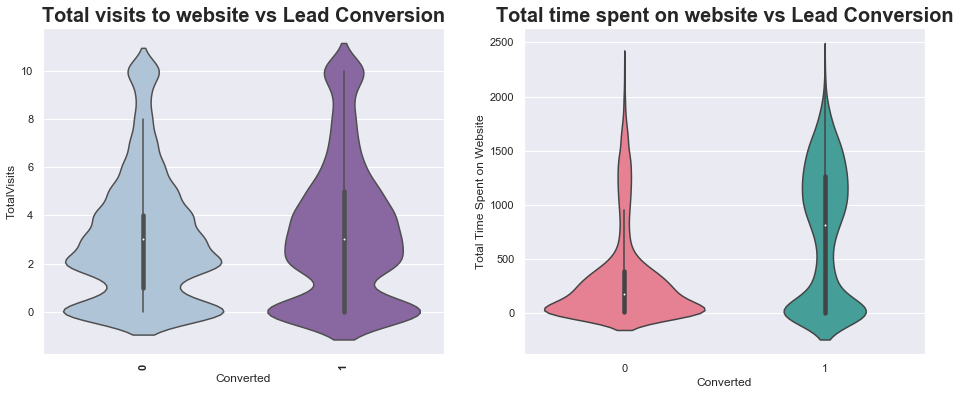

In [57]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.violinplot(y= "TotalVisits", x = "Converted", data = Lead_score, palette= 'BuPu')
plt.xticks(rotation = 90,fontweight="bold")
plt.title('Total visits to website vs Lead Conversion', fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.violinplot(y = "Total Time Spent on Website",x = "Converted", data = Lead_score, palette='husl')
plt.title('Total time spent on website vs Lead Conversion',fontweight="bold", size=20)
plt.subplots_adjust(right=1)
plt.show()

- #### <font color=green>Median for converted and not converted leads are the same.
- #### <font color=green> Leads spending more time on the weblise are more likely to be converted.
- #### <font color=darkblue> Website should be made more engaging to make leads spend more time.
- #### <font color=darkblue> Nothing conclusive can be said on the basis of Total Visits.

###  <font color=blue>Last Activity

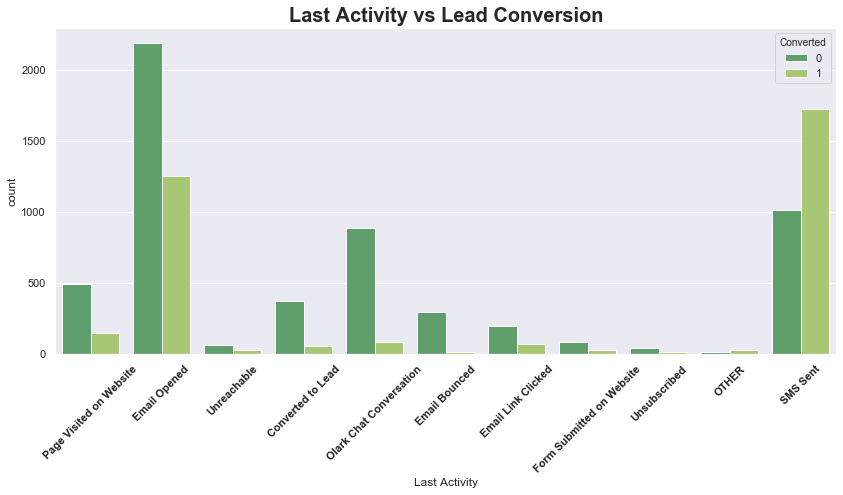

In [58]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Last Activity',hue='Converted', data= Lead_score, palette='summer')
plt.title('Last Activity vs Lead Conversion',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

- #### <font color=green>Most of the lead have their Email opened as their last activity.
- #### <font color=green>Conversion rate for leads with last activity as SMS Sent is almost 60%.

###  <font color=blue>Country

In [59]:
Lead_score.Country.describe()

count     9103 
unique    11   
top       India
freq      6492 
Name: Country, dtype: object

- #### <font color=green>Most of the customers are from India

###  <font color=blue>Specialization

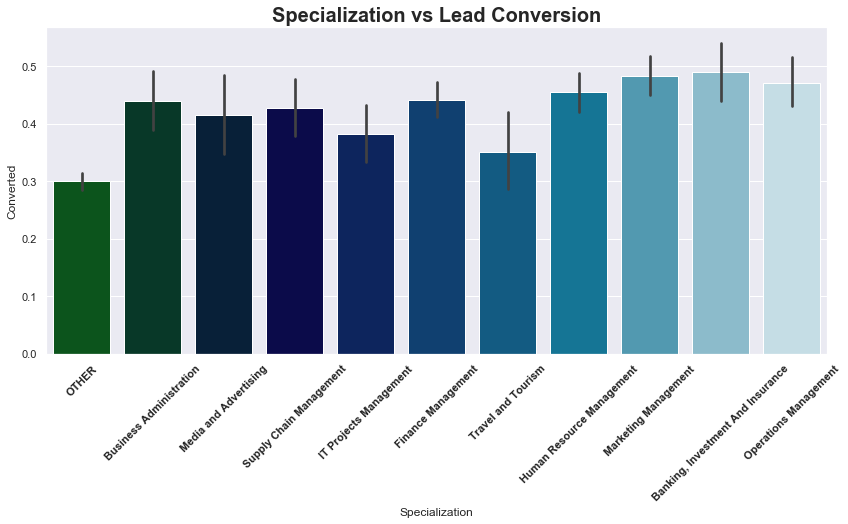

In [60]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Specialization", y="Converted", data=Lead_score,palette='ocean')
plt.xticks(rotation = 45,fontweight="bold")
plt.title('Specialization vs Lead Conversion', fontweight='bold', size=20)

plt.show()

- #### <font color=green>Customers who were in Travel and Tourism domain has less Lead Conversion rate compared to other domains
- #### <font color=green>Focus should be more on the Specialization with high conversion rate.   

### <font color=blue>Current Occupation

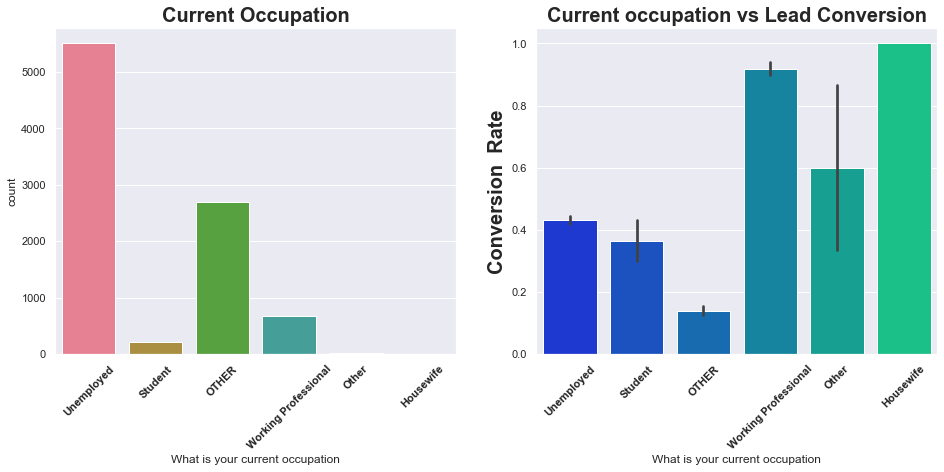

In [61]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)

sns.countplot(x='What is your current occupation', data=Lead_score,palette='husl')
plt.title('Current Occupation',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")

plt.subplot(1,2,2)
sns.barplot(x='What is your current occupation', y="Converted", data=Lead_score,palette='winter')
plt.title('Current occupation vs Lead Conversion',fontweight="bold", size=20)
plt.ylabel("Conversion  Rate",fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplots_adjust(right=1)
plt.show()

- #### <font color=green>There are many customers who are Unemployed
- #### <font color=green>Housewife and Working Professionals going for the course have high chances of joining it. 

- ### <font color=blue> What matters most in choosing course

In [62]:
Lead_score['What matters most to you in choosing a course'].describe()

count     9103                   
unique    3                      
top       Better Career Prospects
freq      6399                   
Name: What matters most to you in choosing a course, dtype: object

- #### <font color=green>Most entries are 'Better Career Prospects'.

 ### <font color=blue>Search

In [63]:
Lead_score['Search'].value_counts()

No     9089
Yes    14  
Name: Search, dtype: int64

- #### <font color=green>Most entries are 'No'

### <font color=blue>City

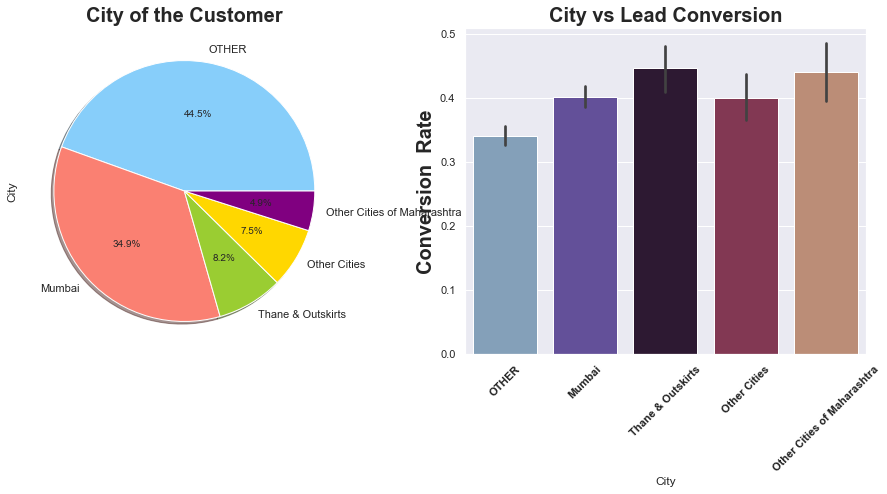

In [64]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['lightskyblue','salmon','yellowgreen', 'gold', 'purple']
Lead_score['City'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('City of the Customer',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(x="City", y="Converted", data=Lead_score,palette='twilight')
plt.title('City vs Lead Conversion',fontweight="bold", size=20)
plt.ylabel("Conversion  Rate",fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplots_adjust(right=1)

plt.show()

- #### <font color=green>35% of the total customers belong to Mumbai
- #### <font color=green>Most leads are from mumbai, Thane & Outskirts, and other cities of Maharashtra with high conversion rate.    

### <font color=blue>Last Notable Activity

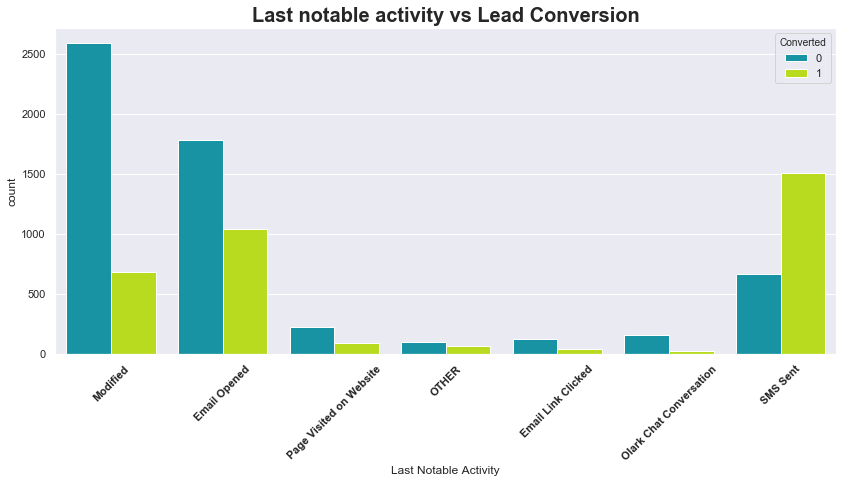

In [65]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Last Notable Activity', hue="Converted", data=Lead_score,palette='nipy_spectral')
plt.xticks(rotation = 45,fontweight="bold")
plt.title('Last notable activity vs Lead Conversion', fontweight='bold', size=20)

plt.show()

- ### <font color=darkgreen>Based on the  analysis above we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [66]:
Lead_score = Lead_score.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Last Notable Activity','Do Not Email', 'Do Not Call'],1)

In [67]:
Lead_score.shape

(9103, 12)

##  <font color=purple>5. Data Preparation

 ### <font color=purple>5.1. Creating dummy variables for all categorical columns

In [68]:
#Categorical columns
Lead_score.loc[:,Lead_score.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [69]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_score[['Lead Origin','Specialization' ,'Lead Source','What is your current occupation','City', 'What matters most to you in choosing a course','Last Activity']], drop_first=False)
# Add the results to the master dataframe
Lead_final = pd.concat([Lead_score, dummy], axis=1)
Lead_final.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_OTHER,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_OTHER,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_OTHER,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_OTHER,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_OTHER,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_OTHER,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0000,0,0.0000,Page Visited on Website,OTHER,Unemployed,Better Career Prospects,OTHER,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0000,674,2.5000,Email Opened,OTHER,Unemployed,Better Career Prospects,OTHER,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0000,305,1.0000,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0000,1428,1.0000,Converted to Lead,OTHER,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


#### We decided not to drop first level of K categories and manually drop the least significant other category variables hence we have used drop_first=False.

In [70]:
#Drop columns after dummy variable creation
Lead_final = Lead_final.drop(['Lead Origin','Specialization' ,'Lead Source','What is your current occupation', 
'What matters most to you in choosing a course','Last Activity', 'City'],1)

In [71]:
Lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9103 non-null   object 
 1   Converted                                                                9103 non-null   int64  
 2   TotalVisits                                                              9103 non-null   float64
 3   Total Time Spent on Website                                              9103 non-null   int64  
 4   Page Views Per Visit                                                     9103 non-null   float64
 5   Lead Origin_API                                                          9103 non-null   uint8  
 6   Lead Origin_Landing Page Submission                                     

In [72]:
Lead_final.columns

Index(['Prospect ID', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_OTHER',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_OTHER',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Wel

In [73]:
#Lets drop the columns having Other in their Category
Lead_final = Lead_final.drop(['Specialization_OTHER','Lead Source_OTHER','City_OTHER', 'City_Other Cities','What is your current occupation_OTHER',
       'What is your current occupation_Other','What matters most to you in choosing a course_OTHER','Last Activity_OTHER'],1)

In [74]:
#Number of columns after dummy variable creation
Lead_final.shape

(9103, 46)

 ###  <font color=purple>5.2. Test-Train Split

In [75]:
# Putting feature variable to X
X = Lead_final.drop(['Prospect ID','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Thane & Outskirts,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0.0000,0,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,5.0000,674,2.5000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2.0000,1532,2.0000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1.0000,305,1.0000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2.0000,1428,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# Putting response variable to y
y = Lead_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
#Rows and columns after split
print(X_train.shape)
print(X_test.shape)


(6372, 44)
(2731, 44)


 ###  <font color=purple>5.3. Rescaling the Features

In [79]:
#scaling continuous variables in the dataset
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Thane & Outskirts,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
7962,-0.0683,1.4763,-0.3941,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5520,1.3625,-0.7711,2.1115,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1962,0.6471,-0.5713,0.0615,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1566,2.4355,1.3938,0.5170,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
9170,-1.1413,-0.8811,-1.0774,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [80]:
### Checking the Lead Conversion Rate
converted = (sum(Lead_final['Converted'])/len(Lead_final['Converted'].index))*100
converted

38.02043282434362

### <font color=green>After Data cleaning and considering only useful variables we are able to get conversion rate of 38%

##  <font color=purple>6. Model Building

**Running our First Training Model**

In [81]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 12 Sep 2020   Deviance:                          nan
Time:                        13:50:12   Pearson chi2:                 7.53e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -6.067e+14   1.59e+07  -3.81e+07      0.000   -6.07e+14   -6.07e+14
TotalVisits                                                              1.664e+14   1.38e+06    1.2e+08      0.000    1.66e+14    1.66e+14
Total Time Spent on Website                                              8.427e+14   9.73e+05   8.66e+08      0.000    8.43e+14    8.43e+14
Page Views Per Visit                                                    -1.723e+14   1.32e+06  -1.31e+08      0.000   -1.72e+14   -1.72e+14
Lead Origin_API                                                         -3.921e+14   1.29e+07  -3.04e+07      0.000   -3.92e+14   -3.92e+14
Lead Origin_Landing Page Submission                                     -5.586e+14   1.29e+07  -4.33e+07      0.000   -5.59e+14   -5.59e+14
Lead Origin_Lead Add Form                                                1.049e+15   1.63e+07   6.44e+07      0.000    1.05e+15    1.05e+15
Lead Origin_Lead Import                                                  -7.05e+14   3.86e+07  -1.82e+07      0.000   -7.05e+14   -7.05e+14
Specialization_Banking, Investment And Insurance                         4.281e+14   4.88e+06   8.78e+07      0.000    4.28e+14    4.28e+14
Specialization_Business Administration                                   1.598e+14   4.65e+06   3.44e+07      0.000     1.6e+14     1.6e+14
Specialization_Finance Management                                        2.459e+14    3.4e+06   7.24e+07      0.000    2.46e+14    2.46e+14
Specialization_Human Resource Management                                 1.983e+14   3.48e+06   5.69e+07      0.000    1.98e+14    1.98e+14
Specialization_IT Projects Management                                    3.778e+14    4.8e+06   7.87e+07      0.000    3.78e+14    3.78e+14
Specialization_Marketing Management                                       3.31e+14   3.44e+06   9.61e+07      0.000    3.31e+14    3.31e+14
Specialization_Media and Advertising                                     8.112e+13   5.96e+06   1.36e+07      0.000    8.11e+13    8.11e+13
Specialization_Operations Management                                     9.229e+13   4.13e+06   2.23e+07      0.000    9.23e+13    9.23e+13
Specialization_Supply Chain Management                                   3.568e+14   4.72e+06   7.56e+07      0.000    3.57e+14    3.57e+14
Specialization_Travel and Tourism                                        2.577e+14   6.24e+06   4.13e+07      0.000    2.58e+14    2.58e+14
Lead Source_Direct Traffic                                              -7.701e+14   1.58e+07  -4.86e+07      0.000    -7.7e+14    -7.7e+14
Lea

 ### <font color=purple>6.1. Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 23)             # running RFE with 23 variables as output
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False])

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Specialization_Banking, Investment And Insurance', False, 3),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Human Resource Management', False, 15),
 ('Specialization_IT Projects Management', False, 11),
 ('Specialization_Marketing Management', False, 4),
 ('Specialization_Media and Advertising', False, 20),
 ('Specialization_Operations Management', False, 16),
 ('Specialization_Supply Chain Management', False, 12),
 ('Specialization_Travel and Tourism', False, 14),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Se

In [86]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent'],
      

In [87]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Reference', 'City_Mumbai',
       'City_Other Cities of Maharashtra', 'City_Thane & Outskirts',
       'Last Activity_Email Opened', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed'],
      dtype='object')

### <font color=purple>6.2. Assessing the model with StatsModels

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.2
Date:                Sat, 12 Sep 2020   Deviance:                       5208.5
Time:                        13:50:16   Pearson chi2:                 6.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.6983      1.473     -0.474      0.635      -3.585       2.189
Total Time Spent on Website                                                 1.1091      0.040     27.485      0.000       1.030       1.188
Lead Origin_API                                                            -1.2369      1.474     -0.839      0.401      -4.126       1.652
Lead Origin_Landing Page Submission                                        -1.4301      1.472     -0.971      0.331      -4.316       1.456
Lead Origin_Lead Add Form                                                   2.0792      1.487      1.398      0.162      -0.835       4.994
Lead Source_Direct Traffic                                                 -0.2971      0.094     -3.147      0.002      -0.482      -0.112
Lead Source_Facebook                                                       -0.5905      1.471     -0.401      0.688      -3.474       2.293
Lead Source_Olark Chat                                                      0.9990      0.128      7.833      0.000       0.749       1.249
Lead Source_Organic Search                                                 -0.1810      0.110     -1.642      0.101      -0.397       0.035
Lead Source_Referral Sites                                                 -0.3293      0.345     -0.955      0.339      -1.005       0.346
Lead Source_Welingak Website                                                1.7858      0.756      2.363      0.018       0.304       3.267
What is your current occupation_Housewife                                  22.0818   1.61e+04      0.001      0.999   -3.16e+04    3.16e+04
What is your current occupation_Student                                    -0.7704      0.569     -1.353      0.176      -1.886       0.346
What is your current occupation_Unemployed                                 -0.9645      0.530     -1.819      0.069      -2.004       0.075
What is your current occupation_Working Professional                        1.6524      0.554      2.980      0.003       0.566       2.739
What matters most to you in choosing a course_Better Career Prospects       2.2025      0.532      4.137      0.000       1.159       3.246
What matters most to you in choosing a course_Flexibility & Convenience    25.4439   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_Converted to Lead                                            -1.3918      0.215     -6.462      0.000      -1.814      -0.970
Last Activity_Email Bounced                                                -2.0028      0.319     -6.277      0.000      -2.628      -1.377
Las

#### The variable  <font color=blue>'What is your current occupation_Housewife'</font> has highest p-value.Lets drop it.

In [89]:
col1=col.drop('What is your current occupation_Housewife',1)


In [90]:
#Lets run the model with selected variables
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Sat, 12 Sep 2020   Deviance:                       5214.0
Time:                        13:50:16   Pearson chi2:                 6.41e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.6919      1.472     -0.470      0.638      -3.577       2.194
Total Time Spent on Website                                                 1.1082      0.040     27.476      0.000       1.029       1.187
Lead Origin_API                                                            -1.2437      1.473     -0.844      0.399      -4.131       1.644
Lead Origin_Landing Page Submission                                        -1.4296      1.472     -0.972      0.331      -4.314       1.455
Lead Origin_Lead Add Form                                                   2.0758      1.486      1.397      0.163      -0.837       4.989
Lead Source_Direct Traffic                                                 -0.3012      0.094     -3.193      0.001      -0.486      -0.116
Lead Source_Facebook                                                       -0.5955      1.471     -0.405      0.686      -3.478       2.287
Lead Source_Olark Chat                                                      0.9998      0.128      7.839      0.000       0.750       1.250
Lead Source_Organic Search                                                 -0.1788      0.110     -1.624      0.104      -0.395       0.037
Lead Source_Referral Sites                                                 -0.3269      0.345     -0.948      0.343      -1.002       0.349
Lead Source_Welingak Website                                                1.7853      0.756      2.362      0.018       0.304       3.267
What is your current occupation_Student                                    -1.2710      0.529     -2.403      0.016      -2.307      -0.235
What is your current occupation_Unemployed                                 -1.4718      0.483     -3.049      0.002      -2.418      -0.526
What is your current occupation_Working Professional                        1.1492      0.512      2.245      0.025       0.146       2.152
What matters most to you in choosing a course_Better Career Prospects       2.7076      0.486      5.569      0.000       1.755       3.660
What matters most to you in choosing a course_Flexibility & Convenience    23.9502   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_Converted to Lead                                            -1.3919      0.215     -6.461      0.000      -1.814      -0.970
Last Activity_Email Bounced                                                -2.0025      0.319     -6.274      0.000      -2.628      -1.377
Last Activity_Email Link Clicked                                           -0.5646      0.222     -2.547      0.011      -0.999      -0.130
Las

#### The variable  <font color=blue>'What matters most to you in choosing a course_Flexibility & Convenience'</font> is having very high p value,  Lets drop it

In [91]:
col2=col1.drop('What matters most to you in choosing a course_Flexibility & Convenience',1)

In [92]:
X_train_sm = sm.add_constant(X_train[col2]) #Rerun the model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Sat, 12 Sep 2020   Deviance:                       5220.6
Time:                        13:50:17   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -0.6922      1.473     -0.470      0.638      -3.579       2.194
Total Time Spent on Website                                               1.1077      0.040     27.479      0.000       1.029       1.187
Lead Origin_API                                                          -1.2377      1.474     -0.840      0.401      -4.126       1.651
Lead Origin_Landing Page Submission                                      -1.4244      1.472     -0.968      0.333      -4.309       1.461
Lead Origin_Lead Add Form                                                 2.0817      1.487      1.400      0.161      -0.832       4.996
Lead Source_Direct Traffic                                               -0.3003      0.094     -3.186      0.001      -0.485      -0.116
Lead Source_Facebook                                                     -0.5913      1.471     -0.402      0.688      -3.474       2.292
Lead Source_Olark Chat                                                    1.0050      0.127      7.885      0.000       0.755       1.255
Lead Source_Organic Search                                               -0.1772      0.110     -1.611      0.107      -0.393       0.038
Lead Source_Referral Sites                                               -0.3285      0.345     -0.953      0.340      -1.004       0.347
Lead Source_Welingak Website                                              1.7846      0.756      2.361      0.018       0.303       3.266
What is your current occupation_Student                                  -1.0586      0.516     -2.051      0.040      -2.071      -0.047
What is your current occupation_Unemployed                               -1.2543      0.469     -2.672      0.008      -2.174      -0.334
What is your current occupation_Working Professional                      1.3632      0.499      2.732      0.006       0.385       2.341
What matters most to you in choosing a course_Better Career Prospects     2.4869      0.473      5.260      0.000       1.560       3.413
Last Activity_Converted to Lead                                          -1.3946      0.215     -6.477      0.000      -1.817      -0.973
Last Activity_Email Bounced                                              -2.0067      0.319     -6.289      0.000      -2.632      -1.381
Last Activity_Email Link Clicked                                         -0.5683      0.221     -2.566      0.010      -1.002      -0.134
Last Activity_Form Submitted on Website                                  -0.7421      0.324     -2.290      0.022      -1.377      -0.107
Last Activity_Olark Chat Conversation          

#### The variable  <font color=blue>'Lead Source_Facebook'</font> is having very high p value,  Lets drop it

In [93]:
col3=col2.drop('Lead Source_Facebook',1)

In [94]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.4
Date:                Sat, 12 Sep 2020   Deviance:                       5220.8
Time:                        13:50:17   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.2576      0.454     -2.770      0.006      -2.147      -0.368
Total Time Spent on Website                                               1.1078      0.040     27.482      0.000       1.029       1.187
Lead Origin_API                                                          -0.6722      0.456     -1.473      0.141      -1.566       0.222
Lead Origin_Landing Page Submission                                      -0.8593      0.454     -1.893      0.058      -1.749       0.030
Lead Origin_Lead Add Form                                                 2.6477      0.493      5.367      0.000       1.681       3.615
Lead Source_Direct Traffic                                               -0.2996      0.094     -3.178      0.001      -0.484      -0.115
Lead Source_Olark Chat                                                    1.0054      0.127      7.889      0.000       0.756       1.255
Lead Source_Organic Search                                               -0.1766      0.110     -1.606      0.108      -0.392       0.039
Lead Source_Referral Sites                                               -0.3284      0.345     -0.953      0.341      -1.004       0.347
Lead Source_Welingak Website                                              1.7844      0.756      2.361      0.018       0.303       3.266
What is your current occupation_Student                                  -1.0659      0.516     -2.065      0.039      -2.077      -0.054
What is your current occupation_Unemployed                               -1.2536      0.469     -2.670      0.008      -2.174      -0.333
What is your current occupation_Working Professional                      1.3636      0.499      2.733      0.006       0.386       2.341
What matters most to you in choosing a course_Better Career Prospects     2.4862      0.473      5.258      0.000       1.560       3.413
Last Activity_Converted to Lead                                          -1.3949      0.215     -6.478      0.000      -1.817      -0.973
Last Activity_Email Bounced                                              -2.0069      0.319     -6.290      0.000      -2.632      -1.382
Last Activity_Email Link Clicked                                         -0.5686      0.221     -2.567      0.010      -1.003      -0.134
Last Activity_Form Submitted on Website                                  -0.7422      0.324     -2.291      0.022      -1.377      -0.107
Last Activity_Olark Chat Conversation                                    -1.5273      0.166     -9.195      0.000      -1.853      -1.202
Last Activity_Page Visited on Website          

#### The variable  <font color=blue>'Lead Source_Referral Sites'</font> is having very high p value,  Lets drop it

In [95]:
col4=col3.drop('Lead Source_Referral Sites',1)

In [96]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.8
Date:                Sat, 12 Sep 2020   Deviance:                       5221.7
Time:                        13:50:17   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.2580      0.454     -2.771      0.006      -2.148      -0.368
Total Time Spent on Website                                               1.1089      0.040     27.513      0.000       1.030       1.188
Lead Origin_API                                                          -0.6900      0.456     -1.513      0.130      -1.584       0.204
Lead Origin_Landing Page Submission                                      -0.8662      0.454     -1.909      0.056      -1.756       0.023
Lead Origin_Lead Add Form                                                 2.6478      0.493      5.367      0.000       1.681       3.615
Lead Source_Direct Traffic                                               -0.2935      0.094     -3.120      0.002      -0.478      -0.109
Lead Source_Olark Chat                                                    1.0240      0.126      8.122      0.000       0.777       1.271
Lead Source_Organic Search                                               -0.1665      0.110     -1.520      0.128      -0.381       0.048
Lead Source_Welingak Website                                              1.7845      0.756      2.361      0.018       0.303       3.266
What is your current occupation_Student                                  -1.0679      0.516     -2.069      0.039      -2.079      -0.056
What is your current occupation_Unemployed                               -1.2583      0.469     -2.680      0.007      -2.179      -0.338
What is your current occupation_Working Professional                      1.3594      0.499      2.724      0.006       0.381       2.337
What matters most to you in choosing a course_Better Career Prospects     2.4919      0.473      5.270      0.000       1.565       3.419
Last Activity_Converted to Lead                                          -1.3932      0.215     -6.473      0.000      -1.815      -0.971
Last Activity_Email Bounced                                              -2.0060      0.319     -6.287      0.000      -2.631      -1.381
Last Activity_Email Link Clicked                                         -0.5716      0.221     -2.582      0.010      -1.005      -0.138
Last Activity_Form Submitted on Website                                  -0.7416      0.324     -2.290      0.022      -1.376      -0.107
Last Activity_Olark Chat Conversation                                    -1.5313      0.166     -9.217      0.000      -1.857      -1.206
Last Activity_Page Visited on Website                                    -0.5876      0.149     -3.947      0.000      -0.879      -0.296
Last Activity_SMS Sent                         

#### The variable  <font color=blue>'Lead Origin_API'</font> is having very high p value,  Lets drop it

In [97]:
col5=col4.drop('Lead Origin_API',1)

In [98]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.9
Date:                Sat, 12 Sep 2020   Deviance:                       5223.8
Time:                        13:50:18   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.9261      0.113    -16.988      0.000      -2.148      -1.704
Total Time Spent on Website                                               1.1031      0.040     27.533      0.000       1.025       1.182
Lead Origin_Landing Page Submission                                      -0.1931      0.096     -2.007      0.045      -0.382      -0.005
Lead Origin_Lead Add Form                                                 3.3094      0.233     14.207      0.000       2.853       3.766
Lead Source_Direct Traffic                                               -0.2976      0.094     -3.167      0.002      -0.482      -0.113
Lead Source_Olark Chat                                                    0.9977      0.125      8.006      0.000       0.753       1.242
Lead Source_Organic Search                                               -0.1769      0.109     -1.619      0.105      -0.391       0.037
Lead Source_Welingak Website                                              1.7848      0.756      2.361      0.018       0.303       3.266
What is your current occupation_Student                                  -1.0668      0.516     -2.068      0.039      -2.078      -0.056
What is your current occupation_Unemployed                               -1.2538      0.469     -2.672      0.008      -2.173      -0.334
What is your current occupation_Working Professional                      1.3665      0.499      2.741      0.006       0.389       2.344
What matters most to you in choosing a course_Better Career Prospects     2.4909      0.472      5.272      0.000       1.565       3.417
Last Activity_Converted to Lead                                          -1.3995      0.215     -6.508      0.000      -1.821      -0.978
Last Activity_Email Bounced                                              -2.0083      0.319     -6.297      0.000      -2.633      -1.383
Last Activity_Email Link Clicked                                         -0.5772      0.221     -2.609      0.009      -1.011      -0.144
Last Activity_Form Submitted on Website                                  -0.7464      0.324     -2.307      0.021      -1.381      -0.112
Last Activity_Olark Chat Conversation                                    -1.5375      0.166     -9.261      0.000      -1.863      -1.212
Last Activity_Page Visited on Website                                    -0.5923      0.149     -3.983      0.000      -0.884      -0.301
Last Activity_SMS Sent                                                    1.0297      0.078     13.140      0.000       0.876       1.183
===============================================

#### The variable  <font color=blue>'Lead Source_Organic Search'</font> is having very high p value,  Lets drop it

In [99]:
col6=col5.drop('Lead Source_Organic Search',1)

In [100]:
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.2
Date:                Sat, 12 Sep 2020   Deviance:                       5226.5
Time:                        13:50:18   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.9715      0.110    -17.896      0.000      -2.187      -1.756
Total Time Spent on Website                                               1.1037      0.040     27.560      0.000       1.025       1.182
Lead Origin_Landing Page Submission                                      -0.1918      0.096     -1.994      0.046      -0.380      -0.003
Lead Origin_Lead Add Form                                                 3.3596      0.231     14.547      0.000       2.907       3.812
Lead Source_Direct Traffic                                               -0.2482      0.089     -2.792      0.005      -0.422      -0.074
Lead Source_Olark Chat                                                    1.0468      0.121      8.642      0.000       0.809       1.284
Lead Source_Welingak Website                                              1.7867      0.756      2.364      0.018       0.305       3.268
What is your current occupation_Student                                  -1.0496      0.514     -2.044      0.041      -2.056      -0.043
What is your current occupation_Unemployed                               -1.2338      0.467     -2.645      0.008      -2.148      -0.319
What is your current occupation_Working Professional                      1.3911      0.496      2.804      0.005       0.419       2.363
What matters most to you in choosing a course_Better Career Prospects     2.4670      0.470      5.251      0.000       1.546       3.388
Last Activity_Converted to Lead                                          -1.4078      0.215     -6.550      0.000      -1.829      -0.987
Last Activity_Email Bounced                                              -2.0219      0.319     -6.344      0.000      -2.647      -1.397
Last Activity_Email Link Clicked                                         -0.5712      0.221     -2.586      0.010      -1.004      -0.138
Last Activity_Form Submitted on Website                                  -0.7270      0.324     -2.246      0.025      -1.361      -0.093
Last Activity_Olark Chat Conversation                                    -1.5336      0.166     -9.242      0.000      -1.859      -1.208
Last Activity_Page Visited on Website                                    -0.5942      0.149     -4.000      0.000      -0.885      -0.303
Last Activity_SMS Sent                                                    1.0251      0.078     13.096      0.000       0.872       1.179
=========================================================================================================================================
"""

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962   0.8487
5520   0.1162
1962   0.3692
1566   0.9621
9170   0.3399
5097   0.1304
8954   0.4152
309    0.2025
5519   0.2949
1050   0.5746
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84869084, 0.11615414, 0.36923679, 0.96206101, 0.33986546,
       0.13044394, 0.41516733, 0.20254468, 0.29486119, 0.57460368])

### <font color=purple>Creating a dataframe with the actual churn flag and the predicted probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.8487,7962
1,0,0.1162,5520
2,0,0.3692,1962
3,1,0.9621,1566
4,0,0.3399,9170


#### <font color=purple>Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.8487,7962,1
1,0,0.1162,5520,0
2,0,0.3692,1962,0
3,1,0.9621,1566,1
4,0,0.3399,9170,0


In [105]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3527  426]
 [ 733 1686]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8181104833647207


### <font color=purple>Checking VIFs

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What matters most to you in choosing a course_Better Career Prospects,120.8100
7,What is your current occupation_Unemployed,105.3400
8,What is your current occupation_Working Professional,13.4900
6,What is your current occupation_Student,4.1700
1,Lead Origin_Landing Page Submission,3.0700
3,Lead Source_Direct Traffic,1.9200
4,Lead Source_Olark Chat,1.7800
2,Lead Origin_Lead Add Form,1.7200
16,Last Activity_SMS Sent,1.6700
14,Last Activity_Olark Chat Conversation,1.4000


#### The variable  <font color=blue>'What matters most to you in choosing a course_Better Career Prospects'</font> is having high VIF value,   It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

In [108]:
col7=col6.drop('What matters most to you in choosing a course_Better Career Prospects',1)

In [109]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col7])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.5
Date:                Sat, 12 Sep 2020   Deviance:                       5257.1
Time:                        13:50:20   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9012      0.108    -17.545      0.000      -2.114      -1.689
Total Time Spent on Website                              1.1070      0.040     27.721      0.000       1.029       1.185
Lead Origin_Landing Page Submission                     -0.1979      0.096     -2.063      0.039      -0.386      -0.010
Lead Origin_Lead Add Form                                3.3935      0.232     14.656      0.000       2.940       3.847
Lead Source_Direct Traffic                              -0.2503      0.089     -2.821      0.005      -0.424      -0.076
Lead Source_Olark Chat                                   1.0313      0.121      8.548      0.000       0.795       1.268
Lead Source_Welingak Website                             1.7541      0.756      2.319      0.020       0.272       3.236
What is your current occupation_Student                  1.3006      0.241      5.397      0.000       0.828       1.773
What is your current occupation_Unemployed               1.1746      0.086     13.650      0.000       1.006       1.343
What is your current occupation_Working Professional     3.7508      0.199     18.884      0.000       3.362       4.140
Last Activity_Converted to Lead                         -1.4357      0.214     -6.711      0.000      -1.855      -1.016
Last Activity_Email Bounced                             -2.0645      0.317     -6.509      0.000      -2.686      -1.443
Last Activity_Email Link Clicked                        -0.5675      0.219     -2.590      0.010      -0.997      -0.138
Last Activity_Form Submitted on Website                 -0.6965      0.323     -2.154      0.031      -1.330      -0.063
Last Activity_Olark Chat Conversation                   -1.5318      0.165     -9.260      0.000      -1.856      -1.208
Last Activity_Page Visited on Website                   -0.5947      0.148     -4.014      0.000      -0.885      -0.304
Last Activity_SMS Sent                                   1.0072      0.078     12.916      0.000       0.854       1.160
========================================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.0700
7,What is your current occupation_Unemployed,2.4000
3,Lead Source_Direct Traffic,1.9200
4,Lead Source_Olark Chat,1.7700
2,Lead Origin_Lead Add Form,1.7100
15,Last Activity_SMS Sent,1.6700
13,Last Activity_Olark Chat Conversation,1.4000
5,Lead Source_Welingak Website,1.3200
0,Total Time Spent on Website,1.3000
8,What is your current occupation_Working Professional,1.3000


#### The variable  <font color=blue>'Lead Origin_Landing Page Submission'</font> is having high vif value,   Lets drop it

In [111]:
col8=col7.drop('Lead Origin_Landing Page Submission',1)

In [112]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col8])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.7
Date:                Sat, 12 Sep 2020   Deviance:                       5261.3
Time:                        13:50:20   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0150      0.094    -21.472      0.000      -2.199      -1.831
Total Time Spent on Website                              1.1052      0.040     27.696      0.000       1.027       1.183
Lead Origin_Lead Add Form                                3.5108      0.225     15.627      0.000       3.070       3.951
Lead Source_Direct Traffic                              -0.3214      0.082     -3.936      0.000      -0.481      -0.161
Lead Source_Olark Chat                                   1.1435      0.108     10.556      0.000       0.931       1.356
Lead Source_Welingak Website                             1.7538      0.756      2.319      0.020       0.272       3.236
What is your current occupation_Student                  1.2916      0.241      5.362      0.000       0.819       1.764
What is your current occupation_Unemployed               1.1711      0.086     13.629      0.000       1.003       1.340
What is your current occupation_Working Professional     3.7418      0.199     18.849      0.000       3.353       4.131
Last Activity_Converted to Lead                         -1.4200      0.214     -6.643      0.000      -1.839      -1.001
Last Activity_Email Bounced                             -2.0748      0.318     -6.532      0.000      -2.697      -1.452
Last Activity_Email Link Clicked                        -0.5624      0.219     -2.564      0.010      -0.992      -0.133
Last Activity_Form Submitted on Website                 -0.7167      0.322     -2.224      0.026      -1.348      -0.085
Last Activity_Olark Chat Conversation                   -1.5030      0.165     -9.119      0.000      -1.826      -1.180
Last Activity_Page Visited on Website                   -0.6006      0.148     -4.058      0.000      -0.891      -0.311
Last Activity_SMS Sent                                   1.0014      0.078     12.859      0.000       0.849       1.154
========================================================================================================================
"""

In [113]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962   0.8568
5520   0.1174
1962   0.3837
1566   0.9633
9170   0.3376
5097   0.1364
8954   0.4125
309    0.2167
5519   0.3007
1050   0.5959
dtype: float64

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
7962,0,0.8568,7962
5520,0,0.1174,5520
1962,0,0.3837,1962
1566,1,0.9633,1566
9170,0,0.3376,9170


In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
7962,0,0.8568,7962,1
5520,0,0.1174,5520,0
1962,0,0.3837,1962,0
1566,1,0.9633,1566,1
9170,0,0.3376,9170,0


In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3532  421]
 [ 733 1686]]


In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8188951663527935


####  Lets check VIF

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,1.9700
3,Lead Source_Olark Chat,1.7000
1,Lead Origin_Lead Add Form,1.6300
14,Last Activity_SMS Sent,1.5900
2,Lead Source_Direct Traffic,1.4500
12,Last Activity_Olark Chat Conversation,1.3900
4,Lead Source_Welingak Website,1.3200
0,Total Time Spent on Website,1.2900
7,What is your current occupation_Working Professional,1.2400
13,Last Activity_Page Visited on Website,1.1000


#### The variables have VIF < 2,which is good for a good model.

In [119]:
X_train_sm = sm.add_constant(X_train[col8])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.7
Date:                Sat, 12 Sep 2020   Deviance:                       5261.3
Time:                        13:50:22   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0150      0.094    -21.472      0.000      -2.199      -1.831
Total Time Spent on Website                              1.1052      0.040     27.696      0.000       1.027       1.183
Lead Origin_Lead Add Form                                3.5108      0.225     15.627      0.000       3.070       3.951
Lead Source_Direct Traffic                              -0.3214      0.082     -3.936      0.000      -0.481      -0.161
Lead Source_Olark Chat                                   1.1435      0.108     10.556      0.000       0.931       1.356
Lead Source_Welingak Website                             1.7538      0.756      2.319      0.020       0.272       3.236
What is your current occupation_Student                  1.2916      0.241      5.362      0.000       0.819       1.764
What is your current occupation_Unemployed               1.1711      0.086     13.629      0.000       1.003       1.340
What is your current occupation_Working Professional     3.7418      0.199     18.849      0.000       3.353       4.131
Last Activity_Converted to Lead                         -1.4200      0.214     -6.643      0.000      -1.839      -1.001
Last Activity_Email Bounced                             -2.0748      0.318     -6.532      0.000      -2.697      -1.452
Last Activity_Email Link Clicked                        -0.5624      0.219     -2.564      0.010      -0.992      -0.133
Last Activity_Form Submitted on Website                 -0.7167      0.322     -2.224      0.026      -1.348      -0.085
Last Activity_Olark Chat Conversation                   -1.5030      0.165     -9.119      0.000      -1.826      -1.180
Last Activity_Page Visited on Website                   -0.6006      0.148     -4.058      0.000      -0.891      -0.311
Last Activity_SMS Sent                                   1.0014      0.078     12.859      0.000       0.849       1.154
========================================================================================================================
"""

In [120]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962   0.8568
5520   0.1174
1962   0.3837
1566   0.9633
9170   0.3376
5097   0.1364
8954   0.4125
309    0.2167
5519   0.3007
1050   0.5959
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85680882, 0.11738558, 0.38370049, 0.96328707, 0.33757421,
       0.13643256, 0.41251331, 0.21673161, 0.30072156, 0.59593576])

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.8568,7962
1,0,0.1174,5520
2,0,0.3837,1962
3,1,0.9633,1566
4,0,0.3376,9170


In [123]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.8568,7962,1
1,0,0.1174,5520,0
2,0,0.3837,1962,0
3,1,0.9633,1566,1
4,0,0.3376,9170,0


In [124]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3532  421]
 [ 733 1686]]


In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8188951663527935


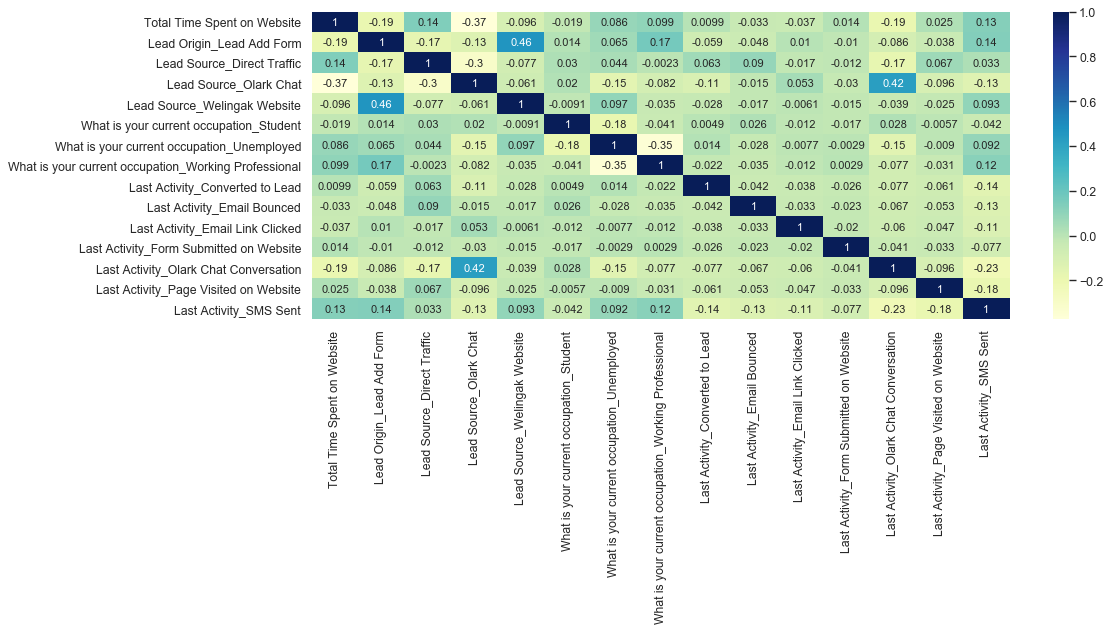

In [126]:
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col8].corr()
ax=sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

#### Our latest model have the following features:
#### <font color = blue>All variables have p-value < 0.05. </font>
#### <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
#### <font color = blue>Got The overall accuracy of 0.81 at a probability threshold of 0.5 .</font>
    
###  So we need not drop any more variables and we can proceed with making predictions using this model only

 ### <font color=purple>6.3. Metrics beyond simply accuracy

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:')
TP / float(TP+FN)

Sensitivity:


0.6969822240595287

In [129]:
# Let us calculate specificity
print('Specificity:')
TN / float(TN+FP)

Specificity:


0.893498608651657

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10650139134834304


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.8001898433792122


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8281359906213365


### <font color=purple>6.4. Plotting ROC

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

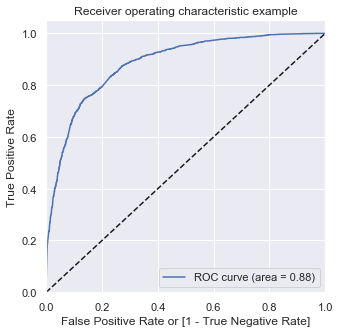

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Area Under the Curve

In [136]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [137]:
auc = auc_val(fpr,tpr)
auc

0.8848097012572379

### <font color=purple>6.5. Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.8568,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.1174,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.3837,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.9633,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.3376,9170,0,1,1,1,1,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000 0.3796    1.0000 0.0000
0.1000 0.1000 0.6048    0.9768 0.3772
0.2000 0.2000 0.7462    0.9144 0.6433
0.3000 0.3000 0.7852    0.8632 0.7374
0.4000 0.4000 0.8120    0.7590 0.8444
0.5000 0.5000 0.8189    0.6970 0.8935
0.6000 0.6000 0.7993    0.5920 0.9261
0.7000 0.7000 0.7834    0.5159 0.9471
0.8000 0.8000 0.7550    0.4084 0.9671
0.9000 0.9000 0.7114    0.2600 0.9876


### Let's plot accuracy sensitivity and specificity for various probabilities

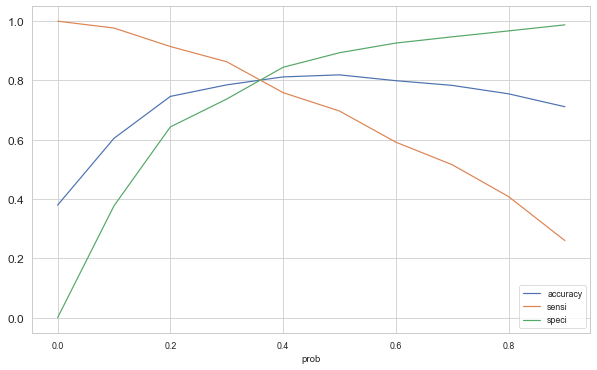

In [203]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
#plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [204]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.86,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.12,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.38,1962,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.96,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.34,9170,0,1,1,1,1,0,0,0,0,0,0,0


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8013182674199624

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3209,  744],
       [ 522, 1897]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [145]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:')
TP / float(TP+FN)

Sensitivity:


0.7842083505580818

#### Specificity

In [146]:
# Let us calculate specificity
print('Specificity:')
TN / float(TN+FP)

Specificity:


0.8117885150518593

#### False Positive Rate

In [147]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18821148494814066


#### Positive Predictive Value

In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7182885270730783


#### Negative Predictive value

In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8600911283838113


### <font color=purple>6.6. Precision and Recall

#### <font color=blue>Looking at the confusion matrix again

In [150]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3532,  421],
       [ 733, 1686]], dtype=int64)

### <font color=blue> Precision
TP / TP + FP

In [151]:
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.8001898433792122

### <font color=blue> Recall
TP / TP + FN

In [152]:
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.6969822240595287

#### <font color=purple> Using sklearn utilities for the same

In [153]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8001898433792122

In [154]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6969822240595287

### <font color=purple>6.7. Precision and recall tradeoff

In [155]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

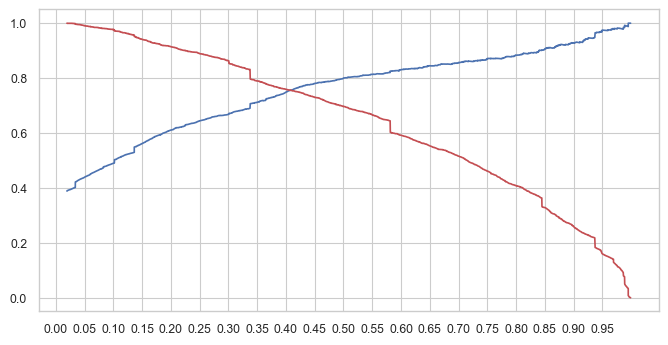

In [157]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### <font color=blue>From the precision-recall graph above, we get the optical threshold value as close to .41. However our business requirement here is to have Lead Conversion Rate around 80%.
### <font color=purple>This is already achieved with our earlier threshold value of 0.34. So we will stick to this value.

## Calculating the F1 score

In [158]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7450287229341582

## <font color=purple>7. Making predictions on the test set

In [159]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])



In [160]:
X_test = X_test[col8]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3504,-0.1038,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4050,-0.8811,1,0,0,0,0,1,0,0,0,0,0,0,0,1
7201,0.4241,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1196,-0.1056,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8219,-0.4283,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [161]:
X_test_sm = sm.add_constant(X_test)


In [162]:
y_test_pred = res.predict(X_test_sm)

In [163]:
y_test_pred[:10]

3504   0.2771
4050   0.9367
7201   0.5756
1196   0.2767
8219   0.0963
8747   0.1364
9048   0.6281
6524   0.1010
7693   0.3016
8187   0.9367
dtype: float64

In [164]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
# Let's see the head
y_pred_1.head()

,0
3504,0.2771
4050,0.9367
7201,0.5756
1196,0.2767
8219,0.0963


In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()


,Converted,Prospect ID,0
0,0,3504,0.2771
1,1,4050,0.9367
2,0,7201,0.5756
3,0,1196,0.2767
4,1,8219,0.0963


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [172]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Prospect ID','Conversion_Prob'], axis=1)

#### Using the probability threshold value 0f 0.34 on the test dataset to predict if a lead will convert

In [173]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [174]:
y_pred_final

,Converted,Prospect ID,Conversion_Prob,final_predicted
0,0,3504,0.2771,0
1,1,4050,0.9367,1
2,0,7201,0.5756,1
3,0,1196,0.2767,0
4,1,8219,0.0963,0
...,...,...,...,...
2726,0,6508,0.2714,0
2727,0,315,0.1616,0
2728,0,3766,0.0584,0
2729,1,8043,0.9271,1


In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8015378982057855

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1351,  338],
       [ 204,  838]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [178]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:')
TP / float(TP+FN)

Sensitivity:


0.8042226487523992

#### Specificity

In [179]:
# Let us calculate specificity
print('Specificity:')
TN / float(TN+FP)

Specificity:


0.7998815867377146

#### False Postive Rate

In [180]:
print(FP/ float(TN+FP))

0.20011841326228538


#### Positive Predictive Value

In [181]:
print (TP / float(TP+FP))

0.7125850340136054


#### Negative Predictive Value

In [182]:
print (TN / float(TN+ FN))

0.8688102893890676


###  <font color=purple> ROC for Test Dataset

In [183]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [184]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

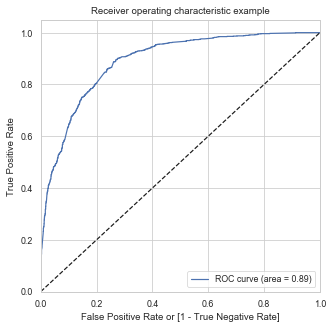

(array([0.        , 0.        , 0.        , ..., 0.99881587, 0.99940793,
        1.        ]),
 array([0.00000000e+00, 9.59692898e-04, 1.91938580e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99747973, 0.99747973, 0.99602868, ..., 0.00621259, 0.00545025,
        0.00508932]))

In [185]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

 ### <font color=purple>Area under the curve

In [186]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

auc = auc_val(fpr,tpr)
auc


#### <font color=blue>As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail
#### <font color=blue>Since we got a value of 0.89, our model seems to be doing well on the test dataset.

## <font color=purple>8. Calculating Lead score for the entire dataset
    
### Lead Score = 100 * Conversion Probability
#### This needs to be calculated for all the leads from the original dataset (train + test)

In [187]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Prospect ID,Conversion_Prob,final_predicted
0,0,3504,0.2771,0
1,1,4050,0.9367,1
2,0,7201,0.5756,1
3,0,1196,0.2767,0
4,1,8219,0.0963,0


In [188]:
#  columns from train dataset
leads_train_pred = y_train_pred_final[['Prospect ID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,7962,0,0.8568,1
1,5520,0,0.1174,0
2,1962,0,0.3837,1
3,1566,1,0.9633,1
4,9170,0,0.3376,0


#### Concatenating the train and the test dataset with the Conversion Probabilities

In [189]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,7962,0,0.8568,1
1,5520,0,0.1174,0
2,1962,0,0.3837,1
3,1566,1,0.9633,1
4,9170,0,0.3376,0


In [190]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)


(6372, 4)
(2731, 4)
(9103, 4)


In [191]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['Prospect ID'].unique().tolist())

9103

In [192]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,7962,0,0.8568,1,86
1,5520,0,0.1174,0,12
2,1962,0,0.3837,1,38
3,1566,1,0.9633,1,96
4,9170,0,0.3376,0,34


In [193]:
# Inspecing the max LeadID
lead_full_pred['Prospect ID'].max()

9239

In [194]:
# Making the ProspectID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('Prospect ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
Prospect ID,,,,
0,0,0.2184,0,22
1,0,0.3888,1,39
2,1,0.7475,1,75
3,0,0.1793,0,18
4,1,0.4147,1,41


In [195]:
# Slicing the Lead Number column from original_leads dataframe
original_leads=pd.read_csv('Leads.csv')
original_leads= original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


### <font color=purple> Concatenating the 2 dataframes based on index.

### This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [196]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0.0000,0.2184,0.0000,22.0000
1,660728,0.0000,0.3888,1.0000,39.0000
2,660727,1.0000,0.7475,1.0000,75.0000
3,660719,0.0000,0.1793,0.0000,18.0000
4,660681,1.0000,0.4147,1.0000,41.0000
5,660680,0.0000,0.0340,0.0000,3.0000
6,660673,1.0000,0.8183,1.0000,82.0000
7,660664,0.0000,0.0340,0.0000,3.0000
8,660624,0.0000,0.0405,0.0000,4.0000
9,660616,0.0000,0.0536,0.0000,5.0000


## <font color=purple>9. Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [197]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                            1.11 
Lead Origin_Lead Add Form                              3.51 
Lead Source_Direct Traffic                             -0.32
Lead Source_Olark Chat                                 1.14 
Lead Source_Welingak Website                           1.75 
What is your current occupation_Student                1.29 
What is your current occupation_Unemployed             1.17 
What is your current occupation_Working Professional   3.74 
Last Activity_Converted to Lead                        -1.42
Last Activity_Email Bounced                            -2.07
Last Activity_Email Link Clicked                       -0.56
Last Activity_Form Submitted on Website                -0.72
Last Activity_Olark Chat Conversation                  -1.50
Last Activity_Page Visited on Website                  -0.60
Last Activity_SMS Sent                                 1.00 
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [198]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                            29.54 
Lead Origin_Lead Add Form                              93.82 
Lead Source_Direct Traffic                             -8.59 
Lead Source_Olark Chat                                 30.56 
Lead Source_Welingak Website                           46.87 
What is your current occupation_Student                34.52 
What is your current occupation_Unemployed             31.30 
What is your current occupation_Working Professional   100.00
Last Activity_Converted to Lead                        -37.95
Last Activity_Email Bounced                            -55.45
Last Activity_Email Link Clicked                       -15.03
Last Activity_Form Submitted on Website                -19.15
Last Activity_Olark Chat Conversation                  -40.17
Last Activity_Page Visited on Website                  -16.05
Last Activity_SMS Sent                                 26.76 
dtype: float64

#### Sorting the feature variables based on their relative coefficient values

In [199]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                             9 
Lead Origin_Lead Add Form                               12
Lead Source_Direct Traffic                              8 
Lead Source_Olark Chat                                  11
Lead Source_Welingak Website                            13
What is your current occupation_Student                 10
What is your current occupation_Unemployed              2 
What is your current occupation_Working Professional    14
Last Activity_Converted to Lead                         0 
Last Activity_Email Bounced                             3 
Last Activity_Email Link Clicked                        6 
Last Activity_Form Submitted on Website                 5 
Last Activity_Olark Chat Conversation                   4 
Last Activity_Page Visited on Website                   1 
Last Activity_SMS Sent                                  7 
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

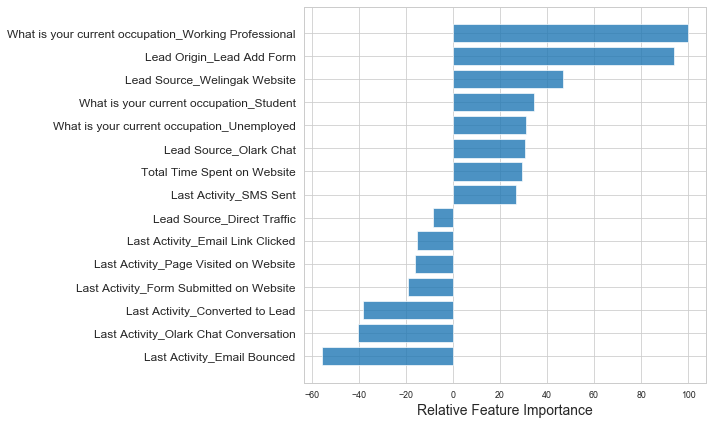

In [200]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col8].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [201]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,What is your current occupation_Working Professional,100.00
1,Lead Origin_Lead Add Form,93.82
4,Lead Source_Welingak Website,46.87


## <font color=purple>10. Conclusion

### After trying several models, we finally chose a model with the following characteristics:
- ###  <font color = blue>All variables have p-value < 0.05. </font>
- ### <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
- ###  <font color = blue>The overall accuracy of 0.80 at a probability threshold of 0.34 on the test dataset is also very acceptable.</font>